# rate_neuron_dm_comp.ipynb

This notebook is for running the models in rate_neuron_dm.py and rate_neuron_dm_dracu.py, as well as to compare them.
Draculab was configured to use the linear interpolation from `cython_get_act3`.

dt = 0.001


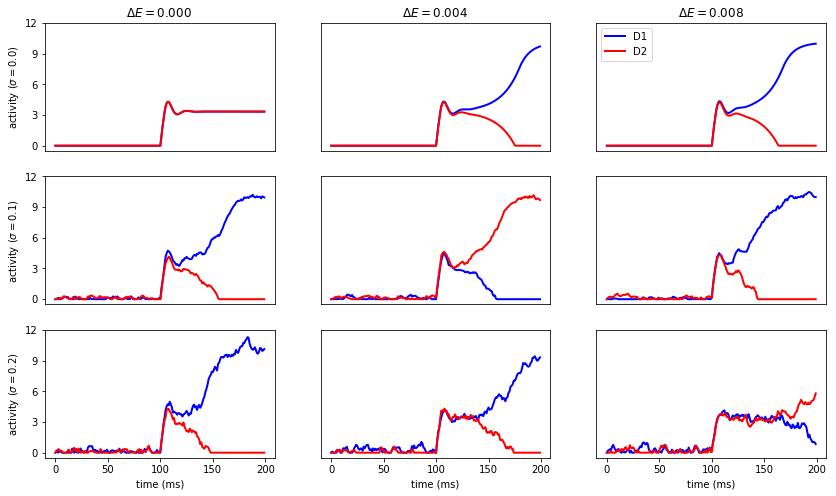

Execution time: 5.706994


In [2]:
# draculab
import time
start = time.time()
exec(open('rate_neuron_dm_dracu.py').read())
end = time.time()
print('Execution time: %f' % (end - start))
#[5.82,5.84,5.87]  <-- dt = 1e-3
#[1.02, .97, 1.028]

dt = 0.001


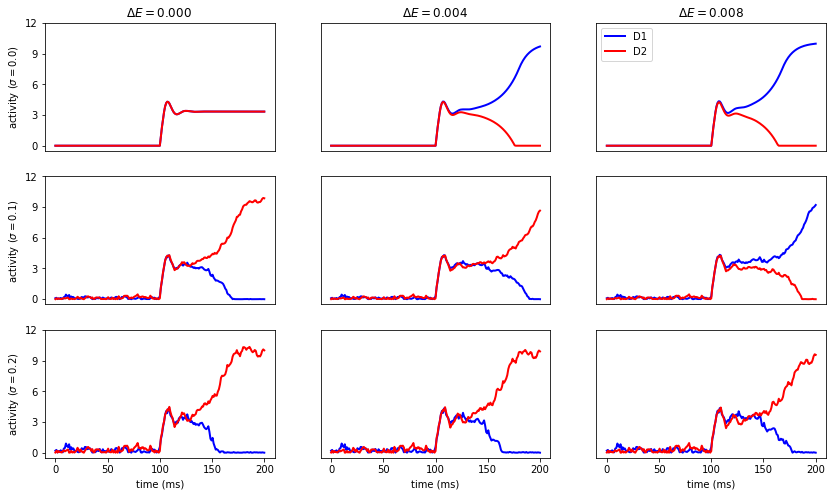

Execution time: 92.654129


In [4]:
# NEST 
import time
import cProfile
import pstats

start = time.time()
#cProfile.run('exec(open(\'rate_neuron_dm_mod.py\').read())', 'restats')
exec(open('rate_neuron_dm_mod.py').read())
end = time.time()
print('Execution time: %f' % (end - start))

#prof = pstats.Stats('restats')
#prof.sort_stats('cumulative').print_stats(30)

#[92.5,92.4,92.58] < -- dt = 1e-3
#[1.5, 1.45, 1.45 ] <-- dt=1e-2

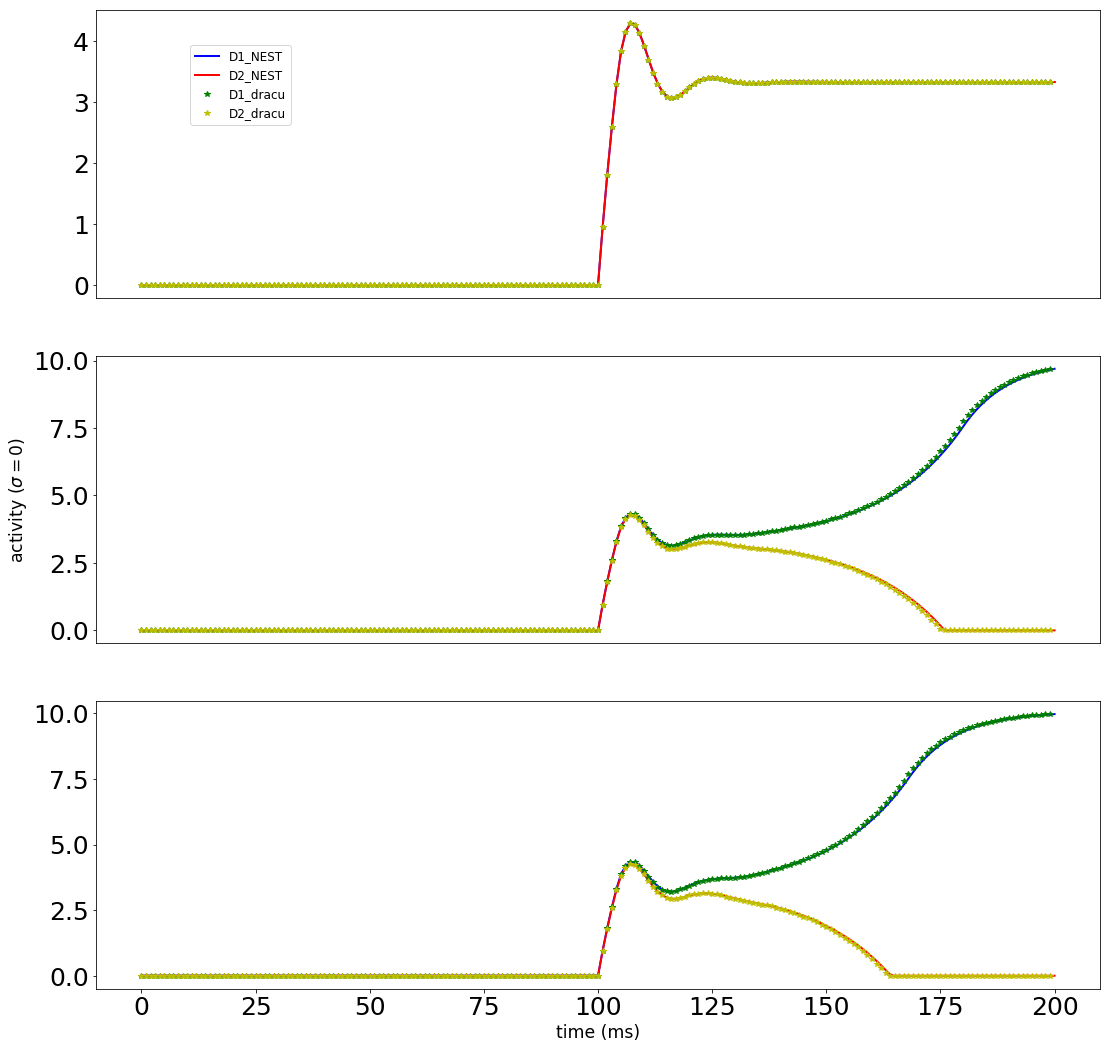

In [5]:
# After running the two cells above compare the noiseless versions
fig = pylab.figure(figsize=(18,18))
ax = [None]*3
sim = 0
senders = noiseless_data[sim][0]['events']['senders']
voltages = noiseless_data[sim][0]['events']['rate']
activs = noiseless_activs[sim]
ax[sim] = fig.add_subplot(3, 1, sim+1)
ax[sim].plot(T, voltages[numpy.where(senders == 1)], 'b', linewidth=2, label="D1_NEST" )
ax[sim].plot(T, voltages[numpy.where(senders == 2)], 'r', linewidth=2, label="D2_NEST" )
ax[sim].plot(times, activs[0], 'g*', linewidth=2, label="D1_dracu")
ax[sim].plot(times, activs[1], 'y*', linewidth=2, label="D2_dracu")
ax[sim].tick_params(labelsize=25)
ax[sim].get_xaxis().set_ticks([])
pylab.legend(bbox_to_anchor=(0.2,0.9), fontsize='large')

#fig1 = pylab.figure(figsize=(12,6))
sim = 1
senders = noiseless_data[sim][0]['events']['senders']
voltages = noiseless_data[sim][0]['events']['rate']
activs = noiseless_activs[sim]
ax[sim] = fig.add_subplot(3, 1, sim+1)
ax[sim].plot(T, voltages[numpy.where(senders == 1)], 'b', linewidth=2, label="D1_NEST" )
ax[sim].plot(T, voltages[numpy.where(senders == 2)], 'r', linewidth=2, label="D2_NEST" )
ax[sim].plot(times, activs[0], 'g*', linewidth=2, label="D1_dracu")
ax[sim].plot(times, activs[1], 'y*', linewidth=2, label="D2_dracu")
ax[sim].set_ylabel("activity ($\sigma=0$)", fontsize='xx-large')
ax[sim].tick_params(labelsize=25)
ax[sim].get_xaxis().set_ticks([])

sim = 2
senders = noiseless_data[sim][0]['events']['senders']
voltages = noiseless_data[sim][0]['events']['rate']
activs = noiseless_activs[sim]
ax[sim] = fig.add_subplot(3, 1, sim+1)
ax[sim].plot(T, voltages[numpy.where(senders == 1)], 'b', linewidth=2, label="D1_NEST" )
ax[sim].plot(T, voltages[numpy.where(senders == 2)], 'r', linewidth=2, label="D2_NEST" )
ax[sim].plot(times, activs[0], 'g*', linewidth=2, label="D1_dracu")
ax[sim].plot(times, activs[1], 'y*', linewidth=2, label="D2_dracu")
ax[sim].tick_params(labelsize=25)
ax[sim].set_xlabel('time (ms)', fontsize='xx-large')
pylab.show()

In [6]:
D1

(1,)

In [7]:
nest.GetStatus([1])

({'Ca': 0.0,
  'archiver_length': 0,
  'beta_Ca': 0.001,
  'element_type': <SLILiteral: neuron>,
  'frozen': False,
  'g': 1.0,
  'g_ex': 1.0,
  'g_in': 1.0,
  'global_id': 1,
  'lambda': 0.1,
  'linear_summation': True,
  'local': True,
  'local_id': 1,
  'mean': 1.008,
  'model': <SLILiteral: lin_rate_ipn>,
  'mult_coupling': False,
  'node_uses_wfr': False,
  'noise': -0.07977637388324738,
  'parent': 0,
  'rate': 0.0,
  'recordables': (<SLILiteral: noise>, <SLILiteral: rate>),
  'rectify_output': True,
  'std': 0.2,
  'supports_precise_spikes': False,
  'synaptic_elements': {},
  't_spike': -1.0,
  'tau': 1.0,
  'tau_Ca': 10000.0,
  'tau_minus': 20.0,
  'tau_minus_triplet': 110.0,
  'theta_ex': 0.0,
  'theta_in': 0.0,
  'thread': 0,
  'thread_local_id': 0,
  'vp': 0},)

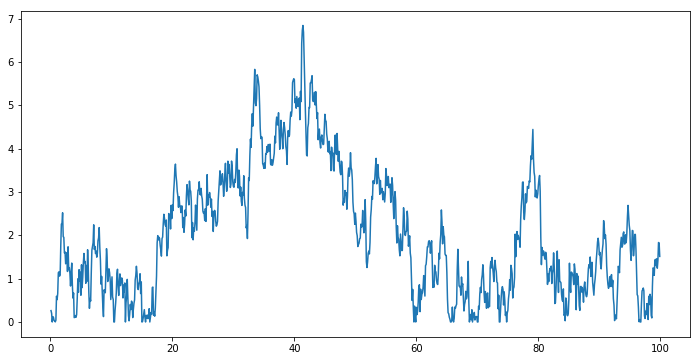

In [8]:
# Single unit simulation with NEST
import nest
import pylab
dt = 0.01
nest.ResetKernel()
nest.SetKernelStatus({'resolution': dt, 'use_wfr': False, 'rng_seeds': [83830]})
params = {'lambda': 0.0, # passive decay rate
          'std': 1.,    # standard Dev. of Gaussian white noise
          'mean': .01,  # mean of Gaussian white noise
          'tau': 1.,    # time constant in ms
          'rectify_output': True}
u = nest.Create('lin_rate_ipn', params=params)
mm = nest.Create('multimeter')
nest.SetStatus(mm, {'interval': 10.*dt, 'record_from': ['rate']})
nest.Connect(mm, u, syn_spec={'delay':dt})
nest.Simulate(100.0)

data = nest.GetStatus(mm)
ts = data[0]['events']['times']
rs = data[0]['events']['rate']

figz = pylab.figure(figsize=(12,6))
pylab.plot(ts, rs)
pylab.show()

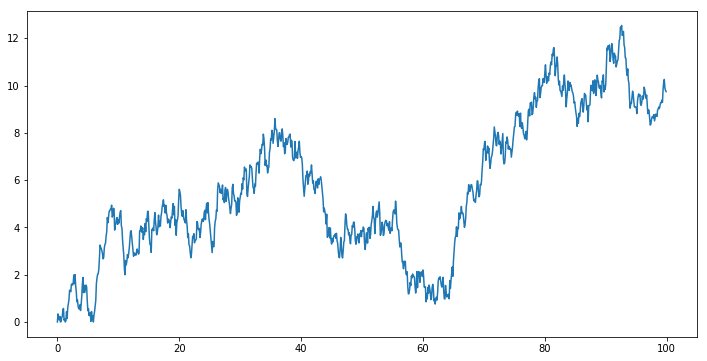

In [9]:
# single unit simulation with draculab
from draculab import *
import pylab
net_params = {'min_delay': .1,    # ms
               'min_buff_size': 10 } 
net = network(net_params)
unit_params =  {'type': unit_types.noisy_linear,
                'init_val': 0.,
                'tau': 1.,  # time constant in milliseconds
                'lambda': 0.0,  # passive decay rate
                'mu': .01,     # mean of Gaussian white noise
                'sigma': 1.}   # std of Gaussian white noise (10xstd)
net.create(1, unit_params)
times, activs, _ = net.run(100.)

figz = pylab.figure(figsize=(12,6))
pylab.plot(times, activs[0])
pylab.show()